# CREATE A PREDICTIVE MODEL USING SKLEARN
## STEPS :
### 1. 

In [1]:
from homeharvest import scrape_property
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import (
    MaxAbsScaler,
    MinMaxScaler,
    Normalizer,
    PowerTransformer,
    QuantileTransformer,
    RobustScaler,
    StandardScaler,
    minmax_scale,
)
from numpy import ravel
import statsmodels.api as sm
from sklearn.feature_selection import VarianceThreshold
from sklearn.neighbors import KNeighborsClassifier 
from scipy.stats import norm


/Users/nikkosiegfried/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/nikkosiegfried/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [28]:
df = pd.read_csv("../data/Los_Angeles_Sold_CLEANED.csv")


In [3]:
df.columns

Index(['property_url', 'mls', 'mls_id', 'status', 'text', 'style',
       'full_street_line', 'street', 'unit', 'city', 'state', 'zip_code',
       'beds', 'full_baths', 'half_baths', 'sqft', 'year_built', 'days_on_mls',
       'list_price', 'list_date', 'sold_price', 'last_sold_date',
       'assessed_value', 'estimated_value', 'lot_sqft', 'price_per_sqft',
       'latitude', 'longitude', 'neighborhoods', 'fips_code', 'stories',
       'hoa_fee', 'parking_garage', 'nearby_schools', 'primary_photo',
       'alt_photos', 'geometry', 'neighbourhood', 'days_on_market',
       'bedcostratio', 'bathcostratio', 'bathbedcostratio',
       'amenitiescostratio', 'pricepersqft', 'priceperlotsqft', 'total_baths',
       'relative_price_per_sqft', 'sold_list_ratio', 'days_on_market_quartile',
       'list_price_quartile', 'hashoa', 'datetime', 'season_listed',
       'sold_list_ratio_classified', 'season_listed_encoded',
       'neighborhood_encoded'],
      dtype='object')

In [35]:
X = df[['list_price',
            'sqft',
            'lot_sqft',
            'year_built',
            'pricepersqft',
            'priceperlotsqft',
            'beds',
            'total_baths',
            'stories',
            'amenitiescostratio',
            'hashoa',
            "season_listed_encoded",
            'days_on_market',
            'zip_code',
            'relative_price_per_sqft',
            'neighborhood_encoded',
            'hoa_fee']]
y = df['sold_list_ratio']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [16]:
# Create a pipeline with a standard scaler and a KNN regressor
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsRegressor())
])

param_grid = {
    'knn__n_neighbors': [1,5,10,15,20,25,30,35,40,45,50,100],
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan']
}
# Create GridSearchCV with the pipeline and parameter grid
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='neg_mean_squared_error')

# Fit GridSearchCV on the training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsRegressor())]),
             param_grid={'knn__metric': ['euclidean', 'manhattan'],
                         'knn__n_neighbors': [1, 5, 10, 15, 20, 25, 30, 35, 40,
                                              45, 50, 100],
                         'knn__weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error')

In [17]:
# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Predict on the test set
y_pred = best_model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Mean Squared Error: {mse}")

Best parameters: {'knn__metric': 'manhattan', 'knn__n_neighbors': 100, 'knn__weights': 'distance'}
Mean Squared Error: 0.0056673987761030635


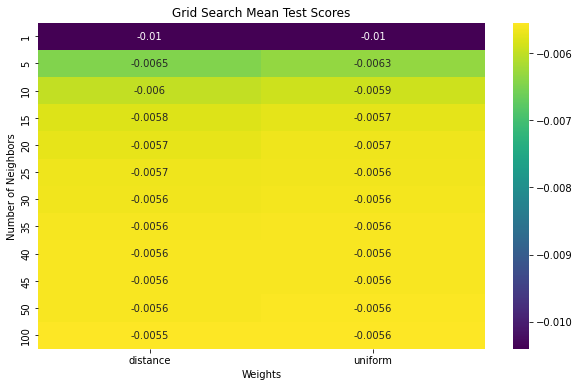

In [18]:
# Extract the results from GridSearchCV
results = grid_search.cv_results_

# Convert results to a DataFrame for easier plotting
results_df = pd.DataFrame(results)

# Pivot the DataFrame to have a heatmap structure
pivot_table = results_df.pivot_table(
    index='param_knn__n_neighbors',
    columns='param_knn__weights',
    values='mean_test_score'
)

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='viridis')
plt.title('Grid Search Mean Test Scores')
plt.xlabel('Weights')
plt.ylabel('Number of Neighbors')
plt.show()

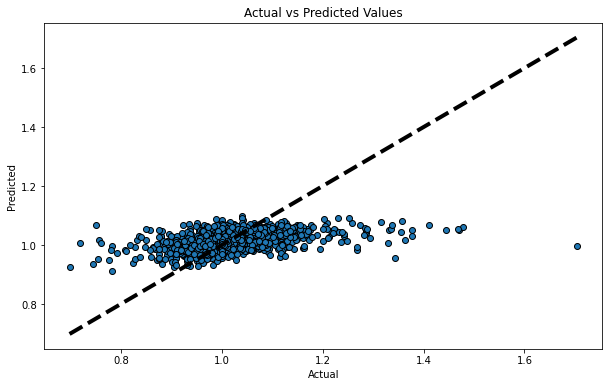

In [19]:
# Plot the predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

In [20]:
['list_price',
            'sqft',
            'lot_sqft',
            'year_built',
            'pricepersqft',
            'priceperlotsqft',
            'beds',
            'total_baths',
            'stories',
            'amenitiescostratio',
            'hashoa',
            "season_listed_encoded",
            'days_on_market',
            'zip_code',
            'relative_price_per_sqft',
            'neighborhood_encoded',
            'hoa_fee']

['list_price',
 'sqft',
 'lot_sqft',
 'year_built',
 'pricepersqft',
 'priceperlotsqft',
 'beds',
 'total_baths',
 'stories',
 'amenitiescostratio',
 'hashoa',
 'season_listed_encoded',
 'days_on_market',
 'zip_code',
 'relative_price_per_sqft',
 'neighborhood_encoded',
 'hoa_fee']

In [39]:

# Preprocessing pipeline
numerical_features = ['list_price',
            'sqft',
            'lot_sqft',
            'year_built',
            'pricepersqft',
            'priceperlotsqft',
            'beds',
            'total_baths',
            'stories',
            'amenitiescostratio',
            'hashoa',
            "season_listed_encoded",
            'days_on_market',
            'zip_code',
            'relative_price_per_sqft',
            'neighborhood_encoded',
            'hoa_fee']
categorical_features = ['neighborhood_encoded']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

# Combine preprocessing and model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

ValueError: Unknown label type: 'continuous'

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score


In [41]:
X_train

,list_price,sqft,lot_sqft,year_built,pricepersqft,priceperlotsqft,beds,total_baths,stories,amenitiescostratio,hashoa,season_listed_encoded,days_on_market,zip_code,relative_price_per_sqft,neighborhood_encoded,hoa_fee
1361,4895000,1978.0,5616.0,1962.0,2384.984833,840.010684,3.0,3.0,1.0,0.000002,0.0,1,101,90402,1.714015,72,0.0
1891,1499000,3602.0,41552.0,1979.0,437.257079,37.904313,4.0,3.0,1.0,0.000006,0.0,1,51,91344,0.745106,39,0.0
1526,929000,1500.0,7830.0,1957.0,632.666667,121.200511,3.0,2.0,1.0,0.000007,0.0,1,38,91324,1.112651,71,0.0
4713,1285000,1763.0,2948.0,2014.0,709.018718,424.016282,3.0,4.0,3.0,0.000007,1.0,3,90,90004,0.695652,57,185.0
4651,800000,1261.0,6558.0,1955.0,693.893735,133.424825,3.0,2.0,1.0,0.000008,0.0,3,35,91335,1.083082,82,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,1089000,1075.0,5445.0,1925.0,1200.000000,236.914601,2.0,1.0,1.0,0.000002,0.0,1,35,90042,1.296567,46,0.0
5191,3225000,3479.0,5629.0,2023.0,926.990515,572.925919,5.0,5.0,2.0,0.000004,0.0,3,22,90066,0.902739,24,0.0
5226,599000,1675.0,6508.0,1927.0,346.268657,89.121082,4.0,2.0,1.0,0.000014,0.0,0,118,90002,0.658045,108,0.0
5390,1595000,1169.0,6331.0,1952.0,1283.147990,236.929395,2.0,1.0,1.0,0.000003,0.0,3,48,90293,1.281915,79,0.0


In [40]:
y_train

1361    0.963739
1891    1.050700
1526    1.021529
4713    0.972763
4651    1.093750
          ...   
3772    1.184573
5191    1.000000
5226    0.968280
5390    0.940439
860     0.974468
Name: sold_list_ratio, Length: 4249, dtype: float64